### Which Machine LEarning Models Are Sensitive To Outliers?

1. Naivye Bayes Classifier--- Not Sensitive To Outliers
2. SVM--- Not Sensitive To Outliers
3. Linear Regression---- Sensitive To Outliers
4. Logistic Regression--- Sensitive To Outliers
5. Decision Tree Regressor or Classifier--- Not Sensitive
6. Ensemble(RF,XGboost,GB)--- Not Sensitive
7. KNN(k-Nearest Neighbors)-----Not Sensitive
8. Kmeans----- Sensitive
9. Hierarichal---- Sensitive
10. PCA(Principal Component Analysis) --- Sensitive
11. Neural Networks---Sensitive
12. LDA (Linear Discriminant Analysis) -- sensitive
13. DBSCAN (Density-Based Spatial Clustering of Applications with Noise) ---sensitive

- ALL unsupervised techniques are sensitive to outliers

##### Example
- titanic age- can be removed
- sales forecasting-keep outliers

In [1]:
import pandas as pd
df=pd.read_csv('titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
df['age'].isnull().sum()

177

In [3]:
import seaborn as sns

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='age', ylabel='Density'>

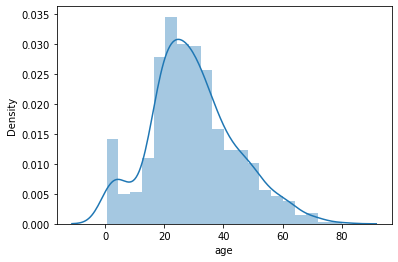

In [4]:
sns.distplot(df['age'].dropna())

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='age', ylabel='Density'>

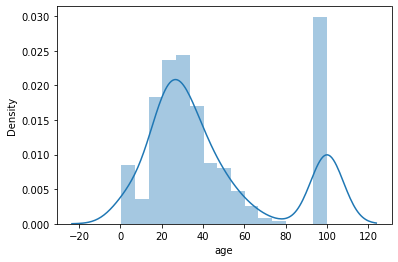

In [5]:
sns.distplot(df['age'].fillna(100))

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='age', ylabel='Density'>

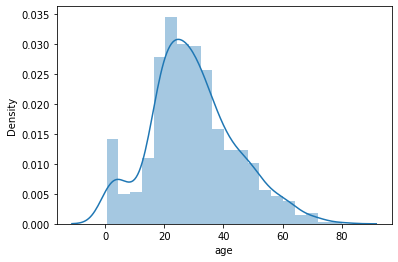

In [6]:
sns.distplot(df['age'])

### gaussian distribution

Text(0, 0.5, 'No of passenger')

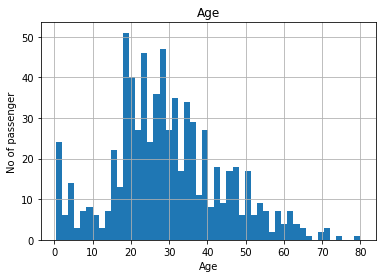

In [9]:
figure=df.age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

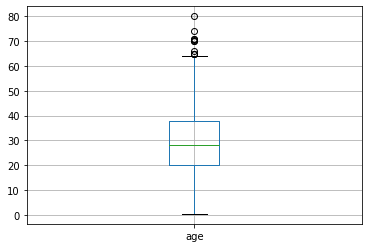

In [10]:
fig_box=df.boxplot(column='age')

In [11]:
df['age'].describecribe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [18]:
##### Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers
up_bound=df['age'].mean()+3*df['age'].std()
low_bound=df['age'].mean()-3*df['age'].std()
low_bound,up_bound


(-13.88037434994331, 73.27860964406095)

In [19]:
##compute interquantile range

IQR=df.age.quantile(0.75)-df.age.quantile(0.25)

In [20]:
IQR

17.875

In [25]:
#to calculate the boundries
lower_bridge=df['age'].quantile(0.25)-(1.5*IQR)
upper_bridge=df['age'].quantile(0.75)+(1.5*IQR)

In [26]:
lower_bridge,upper_bridge

(-6.6875, 64.8125)

In [27]:
#to calculate the extreme boundries
lower_bridge=df['age'].quantile(0.25)-(3*IQR)
upper_bridge=df['age'].quantile(0.75)+(3*IQR)

In [28]:
lower_bridge,upper_bridge

(-33.5, 91.625)

Text(0, 0.5, 'No of passenger')

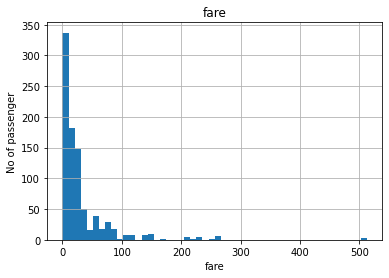

In [29]:
figure=df.fare.hist(bins=50)
figure.set_title('fare')
figure.set_xlabel('fare')
figure.set_ylabel('No of passenger')

<AxesSubplot: >

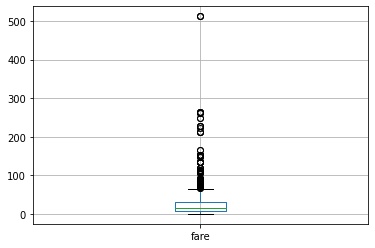

In [31]:
df.boxplot('fare')

In [33]:
df['fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [38]:
IQR=df.fare.quantile(0.75)-df.fare.quantile(0.25)

In [39]:
IQR

23.0896

In [40]:
up_bound=df['fare'].mean()+3*df['fare'].std()
low_bound=df['fare'].mean()-3*df['fare'].std()
low_bound,up_bound

(-116.87607782296807, 181.28449376011736)

In [42]:
#to calculate the boundries
lower_bridge=df['fare'].quantile(0.25)-(1.5*IQR)
upper_bridge=df['fare'].quantile(0.75)+(1.5*IQR)

In [43]:
lower_bridge,upper_bridge

(-26.724, 65.6344)

In [46]:
#to calculate the extreme boundries for skewed data
lower_bridge=df['fare'].quantile(0.25)-(3*IQR)
upper_bridge=df['fare'].quantile(0.75)+(3*IQR)

In [45]:
lower_bridge,upper_bridge

(-61.358399999999996, 100.2688)

In [48]:
data=df.copy()

In [51]:
#replacing the outliers 
data.loc[data['age']>=73,'age']=73

In [52]:
data.loc[data['fare']>=100,'fare']=100

Text(0, 0.5, 'No of passenger')

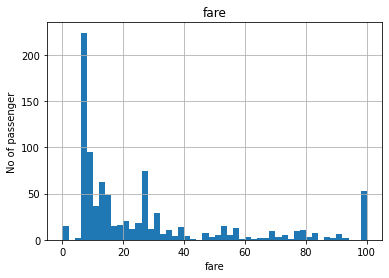

In [54]:
figure=data.fare.hist(bins=50)
figure.set_title('fare')
figure.set_xlabel('fare')
figure.set_ylabel('No of passenger')

Text(0, 0.5, 'No of passenger')

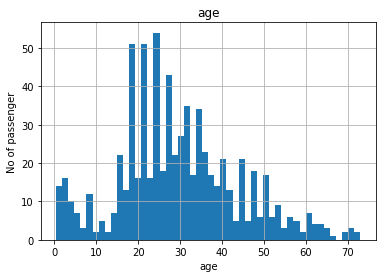

In [55]:
figure=data.age.hist(bins=50)
figure.set_title('age')
figure.set_xlabel('age')
figure.set_ylabel('No of passenger')

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data[['age','fare']].fillna(0),data['survived'],test_size=0.2)
### Logistic Regression
from sklearn.linear_model import LogisticRegression

In [60]:
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.6871508379888268
roc_auc_score: 0.7342726081258191


In [61]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.6815642458100558
roc_auc_score: 0.7378112712975098
